<h1>Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.</h1>

In [221]:
# imports
import pandas as pd
import csv
import random

<p>a. Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint) 
<br>
<br>
b. Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach
holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)</p>

In [222]:
rows = 500
with open('data_third.csv', 'w') as f:
    file = csv.writer(f)

    file.writerow(['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
   
    for _ in range(rows):
        salary = random.randint(30000, 100000)
        city = random.choice(['Bishkek', 'Karakol', 'Osh', 'Kara-Balta', 'Naryn', 'Talas', 'Batken', 'Djalal-Abad', 'Balykchy'])
        age = random.randint(30, 65)
        vacation_prefer = random.choice(['Beach', 'Shopping', 'At home', 'Walking', 'Sport', 'Mountain', 'Park', 'Diving'])
        transport_prefer = random.choice(['auto', 'plane', 'train', 'boat', 'cruise'])
        target = random.choice(['Astana', 'Ankara', 'Berlin', 'Tashkent', 'Washington', 'Paris', 'Vien', 'Rome'])
    
        file.writerow([salary, city, age, vacation_prefer, transport_prefer, target])

<p>Чтение CSV-файла в DataFrame</p>

In [223]:
df = pd.read_csv('data_third.csv')
data1 = df.copy(deep=True)

<p>Проверка наличия пропущенных значений</p>

In [224]:
df.isnull().sum()

salary              0
city                0
age                 0
vacation_prefer     0
transport_prefer    0
target              0
dtype: int64

<p>Преобразовать категориальные данные в числовые, используя
panadas.get_dummies.</p>

1 - True, False

In [225]:
df_encoded = df.copy()
 
dummies = pd.get_dummies(df_encoded, columns=['city', 'vacation_prefer', 'transport_prefer', 'target'],  drop_first=True)
 
# Concatenate the dummies to original dataframe
merged = pd.concat([df_encoded, dummies], axis='columns')

merged.drop(['city', 'vacation_prefer', 'transport_prefer', 'target'], axis='columns')

print(merged)

     salary        city  age vacation_prefer transport_prefer      target  \
0     47466     Karakol   42         Walking             auto      Berlin   
1     65906    Balykchy   32           Beach            train        Vien   
2     89765       Naryn   52           Sport             auto  Washington   
3     80953         Osh   58         Walking           cruise      Ankara   
4     49740  Kara-Balta   46         At home            plane      Astana   
..      ...         ...  ...             ...              ...         ...   
495   87552         Osh   32          Diving             boat      Astana   
496   74464     Karakol   38           Sport             boat       Paris   
497   37619      Batken   37         Walking             boat      Ankara   
498   56007     Karakol   56           Sport            train  Washington   
499   68979       Naryn   39        Shopping            plane      Astana   

     salary  age  city_Batken  city_Bishkek  ...  transport_prefer_cruise  

2 - Числовые данные

In [226]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in ['city', 'vacation_prefer', 'transport_prefer', 'target']:
    df[column] = label_encoder.fit_transform(df[column])

df.head(50)

,salary,city,age,vacation_prefer,transport_prefer,target
0,47466,5,42,7,0,2
1,65906,0,32,1,4,6
2,89765,6,52,6,0,7
3,80953,7,58,7,2,0
4,49740,4,46,0,3,1
5,85167,7,59,3,2,3
6,78438,6,55,7,4,6
7,92459,5,40,1,1,0
8,74759,8,52,4,0,7
9,59304,8,64,3,0,0


Выделить обучающую выборку и тестовую выборку (X_train, y_train, X_test, y_test)

In [227]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборку
X = df.drop('target', axis=1)
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (400, 5)
Размер тестовой выборки: (100, 5)


Выбрать модель классификатор 

In [228]:
from sklearn.linear_model import LogisticRegression

# Создание модели логистической регрессии с указанными гиперпараметрами
logreg = LogisticRegression(C=0.01, random_state=42)

# Обучение модели на обучающих данных
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=42)

In [229]:
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.142
Test set score: 0.130


In [230]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Прогноз на тестовой выборке
y_pred = logreg.predict(X_test)

# Оценка модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on Test Data: {:.2f}'.format(accuracy))

Accuracy on Test Data: 0.13


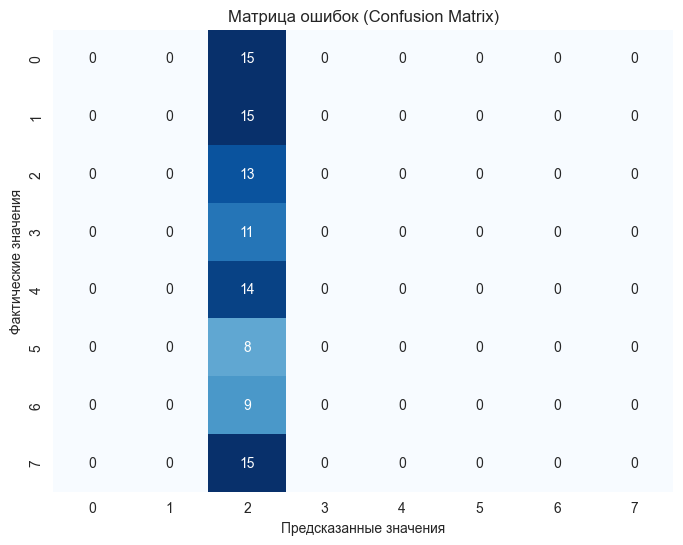

In [231]:
from matplotlib import pyplot as plt
import seaborn as sns
# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()

In [232]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

In [233]:
# Вывод средней точности
print('Средняя точность модели: {:.3f}'.format(scores.mean()))

Средняя точность модели: 0.122


In [234]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg, X, y, cv=kfold)))

kfold3 = KFold(n_splits=3)
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg, X, y, cv=kfold3)))

Значения правильности перекрестной проверки: 
[0.14 0.1  0.11 0.15 0.09]
Значения правильности перекрестной проверки: 
[0.13772455 0.13173653 0.11445783]


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [237]:
X = df.drop('target', axis=1)
y = df['target']

# normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('model accuracy:', accuracy)

model accuracy: 0.12


[[3 4 3 4 1 0 1 2]
 [4 2 6 3 0 0 2 2]
 [5 2 6 1 1 1 1 0]
 [3 0 4 1 0 4 0 0]
 [5 0 5 3 0 1 1 2]
 [5 1 5 0 1 0 2 1]
 [2 2 4 1 0 1 3 2]
 [2 0 4 3 0 1 2 0]]


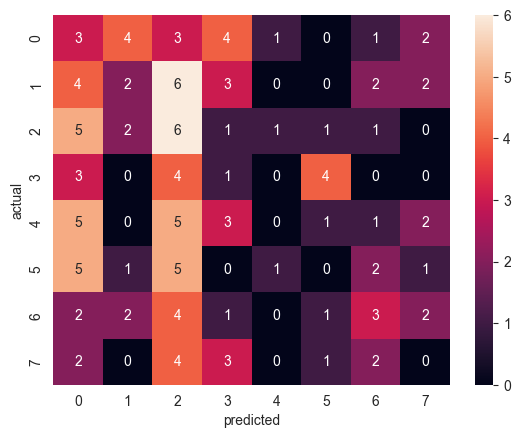

In [238]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

sns.heatmap(confusion, annot=True)

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [239]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_combo = {'gamma': gamma, 'C': C}

print('best SVM score: {}'.format(best_svc))
print('best parameters: {}'.format(best_combo))

best SVM score: 0.144
best parameters: {'gamma': 100, 'C': 0.001}


In [241]:
from sklearn.model_selection import GridSearchCV

grid1 = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(SVC(), grid1, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs1.fit(X_train, y_train)
score1 = gs1.score(X_test, y_test)

print('test score:', score1)
print('best params: ', gs1.best_params_)
print('best score: ', gs1.best_score_)
print('whole args view :', gs1.best_estimator_)

results1 = pd.DataFrame(gs1.cv_results_)
display(results1.head())

test score: 0.08
best params:  {'C': 10, 'gamma': 0.001}
best score:  0.1733333333333333
whole args view : SVC(C=10, gamma=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017444,0.003425,0.006251,0.007656,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.146667,0.160000,0.133333,0.146667,0.160000,0.149333,0.009978,4
1,0.011896,0.005143,0.013528,0.007885,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.133333,0.160000,0.146667,0.146667,0.160000,0.149333,0.009978,4
2,0.015424,0.000411,0.005331,0.006691,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.133333,0.160000,0.146667,0.146667,0.133333,0.144000,0.009978,14
3,0.016727,0.010465,0.011268,0.006120,0.001,1,"{'C': 0.001, 'gamma': 1}",0.133333,0.133333,0.146667,0.133333,0.120000,0.133333,0.008433,34
4,0.017629,0.008727,0.012832,0.006272,0.001,10,"{'C': 0.001, 'gamma': 10}",0.133333,0.133333,0.146667,0.146667,0.146667,0.141333,0.006532,17


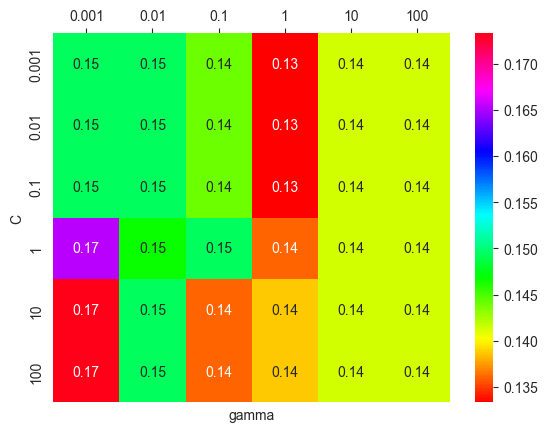

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sc = np.array(results1.mean_test_score).reshape(6, 6)
ax = sns.heatmap(sc, annot=True, xticklabels=grid1['gamma'], yticklabels=grid1['C'], cmap='hsv')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()

plt.show()

In [243]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.17      0.13        18
           1       0.18      0.11      0.13        19
           2       0.16      0.35      0.22        17
           3       0.06      0.08      0.07        12
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        15
           6       0.25      0.20      0.22        15
           7       0.00      0.00      0.00        12

    accuracy                           0.12       125
   macro avg       0.09      0.11      0.10       125
weighted avg       0.10      0.12      0.10       125


В результате проведенной работы была создана модель классификатора для определения предпочтений человека по проведению отпуска в различных городах. Для этого был создан собственный датасет из 500 строк с категориальными данными, такими как зарплата, город проживания, возраст, предпочтения отпуска и транспорта, а также целевая переменная - город, в котором предпочитается провести отпуск.

Для преобразования категориальных данных в числовые использовалась техника one-hot encoding с помощью pandas.get_dummies. Затем данные были разделены на обучающую и тестовую выборки, и была выбрана модель логистической регрессии для обучения. Оценка модели показала низкую точность на тестовых данных (Accuracy on Test Data: 0.13), что может свидетельствовать о недостаточной сложности модели.

Далее были проведены оценки модели с использованием кросс-валидации и подбора параметров модели. 

После этого была применена модель Support Vector Machine (SVM) с использованием GridSearchCV для подбора оптимальных параметров. Несмотря на эти усилия, точность модели осталась невысокой (model accuracy: 0.12).

Объем данных оказался недостаточным для построения более точной модели и правильности прогнозирования, так как я создала датасет с 500-строками, используя разные методы, постралась улучшить работу обучения и прогноза.